In [317]:
import pandas as pd 
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
data = pd.read_csv(url)
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)

In [318]:
distrito = data[['Bairro', 'Metragem']]
media_bairros = distrito.groupby(["Bairro"]).mean()
media_bairros

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

In [319]:
# 1 forma:

select_dados = data['Bairro']
select_dados

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [320]:
#2 forma:
select_dados = data.groupby(['Bairro']).size()
select_dados

Bairro
Aclimação             88
Alto da Boa Vista      8
Alto da Lapa          86
Alto da Mooca         20
Alto de Pinheiros    409
                    ... 
Vila Água Funda        5
Água Branca           13
Água Fria             12
Água Funda             2
Água Rasa              8
Length: 701, dtype: int64

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)

<AxesSubplot:xlabel='Bairro'>

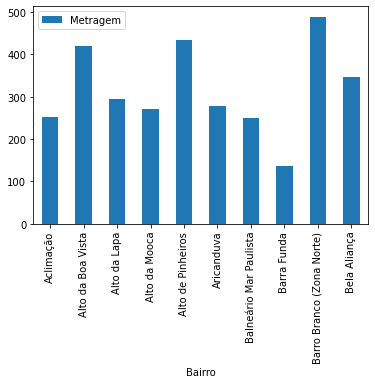

In [321]:
'''
O Gráfico o mesmo utilizado na aula 1
mostra os 10 primeiros bairros que tem a maior metragem 
de imoveis a venda
'''

metragem_bairros = data[['Bairro', 'Metragem']]
media_bairros.head(10).plot.bar()


<AxesSubplot:>

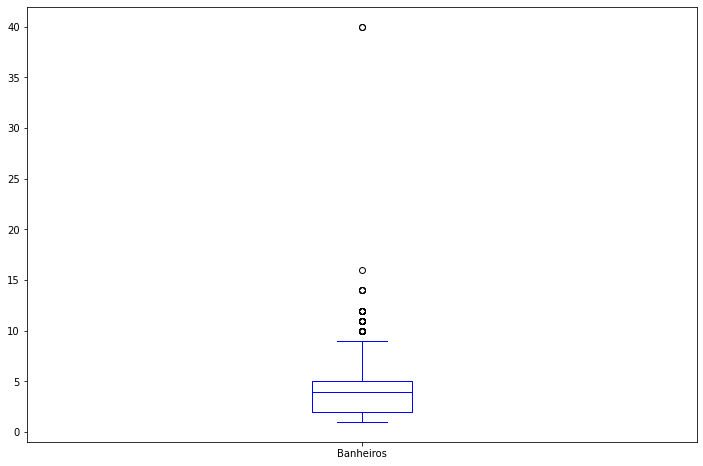

In [322]:
'''
O boxplot mostra se existem outliers dentro de uma series ou df
no caso estamos vendo a quantidade de banheiros dentro dos imoveis
percebe-se a quantidade adequada, entretanto existem outliers
'''

data['Banheiros'].plot.box(color = 'Blue', figsize=(12,8))

'\nQuantidade de imoveis por preço de venda no dataset\n\n'

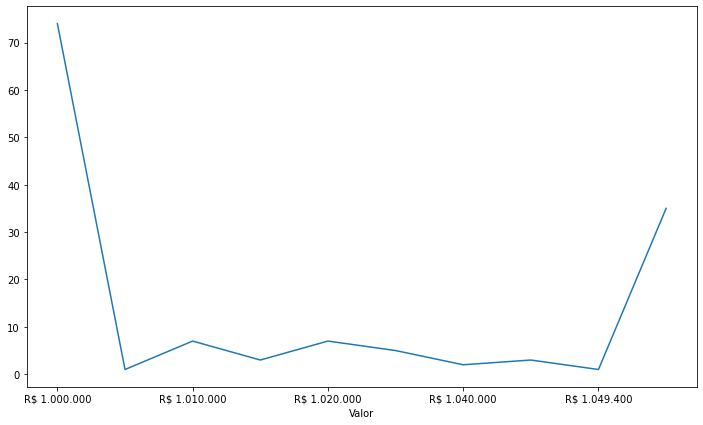

In [323]:
valores_imoveis = data.groupby(['Valor']).size()
valores_imoveis.head(10).plot.line(figsize=(12,7))

'''
Quantidade de imoveis por preço de venda no dataset

'''

In [324]:
valores_imoveis

Valor
R$ 1.000.000    74
R$ 1.009.900     1
R$ 1.010.000     7
R$ 1.011.000     3
R$ 1.020.000     7
                ..
R$ 997.000       3
R$ 998.000       1
R$ 999.000       4
R$ 999.900       1
R$ 999.999       1
Length: 1041, dtype: int64

4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)

In [325]:
# Apenas da ccoluna metragem

media = data.Metragem.mean()
mediana = data.Metragem.median()
min_v = data.Metragem.min()
max_v = data.Metragem.max()

print('Media: ', media, 
      '\nMediana: ', mediana, 
      '\nMínimo: ', min_v, 
      '\nMáximo: ', max_v)

Media:  442.30065947242207 
Mediana:  290.0 
Mínimo:  10 
Máximo:  750000


In [326]:
# Apenas da ccoluna Banheiros

media = data.Banheiros.mean()
mediana = data.Banheiros.median()
min_v = data.Banheiros.min()
max_v = data.Banheiros.max()

print('Media: ', media, 
      '\nMediana: ', mediana, 
      '\nMínimo: ', min_v, 
      '\nMáximo: ', max_v)

Media:  3.8790967226219024 
Mediana:  4.0 
Mínimo:  1 
Máximo:  40


5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

In [327]:
data.Bairro.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10008 entries, 0 to 10007
Series name: Bairro
Non-Null Count  Dtype 
--------------  ----- 
9996 non-null   object
dtypes: object(1)
memory usage: 78.3+ KB


In [328]:
data.isnull().sum()

Rua          3434
Bairro         12
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64

In [329]:
dados_de_bairro_e_rua = data.groupby(['Rua', 'Bairro']).size()
dados_de_bairro_e_rua

Rua                          Bairro                          
Alameda Calicut              Chácara Santo Antônio (Zona Sul)    1
Alameda Campinas             Jardim Paulista                     1
Alameda Canuri               Planalto Paulista                   2
Alameda Casa Branca          Jardim Paulista                     1
Alameda Franca               Jardim Paulista                     4
                                                                ..
Travessa Saveiros de Maroim  Vila Constança                      2
Travessa Umberto Bignardi    Paraíso                             2
Viela Um                     Jardim Peri                         4
Viela Um, 1059               Jardim Peri                         1
Viela Um, 289                Jardim Peri                         2
Length: 3179, dtype: int64

In [330]:
'''dados_de_rua = data['Rua']

for i in dados_de_rua:
    if pd.isna(i):
        print(i)'''

"dados_de_rua = data['Rua']\n\nfor i in dados_de_rua:\n    if pd.isna(i):\n        print(i)"

In [347]:
#Depois de horas tentando kkkk

dados = data.loc[data['Rua'].isna(), 'Rua']
dados

3       NaN
11      NaN
31      NaN
56      NaN
57      NaN
       ... 
9963    NaN
9989    NaN
9991    NaN
9995    NaN
9999    NaN
Name: Rua, Length: 3434, dtype: object